## Data loading

### Subtask:
Load the data from the "AllProducts.json" file into a Pandas DataFrame.


**Reasoning**:
Load the data from the "AllProducts.json" file into a Pandas DataFrame and inspect the first few rows.



In [ ]:
import pandas as pd
import json

try:
    with open('AllProducts.json', 'r') as f:
        data = json.load(f)

    if isinstance(data, list) and all(isinstance(item, dict) for item in data):
      df_products = pd.DataFrame(data)
    elif isinstance(data, dict) and 'products' in data and isinstance(data['products'], list):
      df_products = pd.DataFrame(data['products'])
    else:
      raise ValueError("Unexpected JSON structure. Expected a list of dictionaries or a dictionary with a 'products' key containing a list of dictionaries.")

    display(df_products.head())
    print(df_products.shape)
except FileNotFoundError:
    print("Error: 'AllProducts.json' not found.")
    df_products = pd.DataFrame() # Create an empty DataFrame to avoid further errors
except json.JSONDecodeError:
    print("Error: Invalid JSON format in 'AllProducts.json'.")
    df_products = pd.DataFrame()
except ValueError as e:
    print(f"Error: {e}")
    df_products = pd.DataFrame()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_products = pd.DataFrame()

,_id,competitor,product_name,product_url,product_price,discount,category,sub_category,stock_status
0,{'$oid': '681931b543551322b2fbad53'},LofficielShop,Mini Pc de bureau BMAX B1 PRO N4000 8GB 128SSD...,https://lofficielshop.tn/fr/pc-bureautique/338...,375.0,0.0,Ordinateurs,PC Bureau,En stock
1,{'$oid': '681931b543551322b2fbad54'},LofficielShop,Mini PC de Bureau BMAX B3 N5095 8Go 256Go SSD,https://lofficielshop.tn/fr/pc-bureautique/338...,539.0,0.0,Ordinateurs,PC Bureau,Hors stock
2,{'$oid': '681931b543551322b2fbad55'},LofficielShop,PC de bureau Pro MSI Celeron G5905 8 Go,https://lofficielshop.tn/fr/pc-bureautique/338...,679.0,0.0,Ordinateurs,PC Bureau,En stock
3,{'$oid': '681931b543551322b2fbad56'},LofficielShop,PC de Bureau PRO MSI Pentium Gold G6400 8 Go 2...,https://lofficielshop.tn/fr/pc-bureautique/338...,699.0,0.0,Ordinateurs,PC Bureau,En stock
4,{'$oid': '681931b543551322b2fbad57'},LofficielShop,PC de bureau Pro MSI / Celeron G6900 / 8 Go,https://lofficielshop.tn/fr/pc-bureautique/339...,759.0,0.0,Ordinateurs,PC Bureau,En stock


(15188, 9)


## Data exploration

### Subtask:
Explore the loaded data to understand its characteristics.


**Reasoning**:
Explore the data by examining its shape, data types, missing values, descriptive statistics, and unique identifier.



**Reasoning**:
The previous code failed due to unhashable type 'dict' in the '_id' column.  We need to extract the '$oid' value from the nested dictionary and create a new column with it. Then, we re-run the analysis on the new column.



In [ ]:
import pandas as pd

# Extract '$oid' from '_id' column
df_products['oid'] = df_products['_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else None)

# Data Shape and Types
print("Data Shape:", df_products.shape)
print("\nData Types:\n", df_products.dtypes)

# Missing Values
missing_values = df_products.isnull().sum()
missing_percentage = (missing_values / len(df_products)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df_products.describe(include='all'))

# Categorical Feature Analysis
categorical_cols = ['competitor', 'category', 'sub_category', 'stock_status']
for col in categorical_cols:
    print(f"\nUnique values and counts for '{col}':\n{df_products[col].value_counts()}")

# Unique Identifier Check
print(f"\nNumber of unique 'oid' values: {df_products['oid'].nunique()}")
print(f"Number of total 'oid' values: {len(df_products['oid'])}")
id_duplicates = df_products['oid'].duplicated().sum()
if id_duplicates > 0:
    print(f"\nThere are {id_duplicates} duplicate 'oid' values.")
    display(df_products[df_products['oid'].duplicated(keep=False)].sort_values('oid'))
else:
    print("\n'oid' column has unique values.")

Data Shape: (15188, 10)

Data Types:
 _id               object
competitor        object
product_name      object
product_url       object
product_price    float64
discount         float64
category          object
sub_category      object
stock_status      object
oid               object
dtype: object

Missing Values:
 _id              0
competitor       0
product_name     0
product_url      0
product_price    0
discount         0
category         0
sub_category     0
stock_status     0
oid              0
dtype: int64

Missing Value Percentage:
 _id              0.0
competitor       0.0
product_name     0.0
product_url      0.0
product_price    0.0
discount         0.0
category         0.0
sub_category     0.0
stock_status     0.0
oid              0.0
dtype: float64

Descriptive Statistics:
                                          _id competitor  \
count                                  15188      15188   
unique                                 15188          6   
top     {'$oid': '681

**Reasoning**:
The analysis is almost complete. We need to finish the analysis of categorical features and then check for correlation between numerical features.



In [ ]:
# Continue Categorical Feature Analysis (from previous output)
print(f"\nUnique values and counts for 'category':\n{df_products['category'].value_counts()}")
print(f"\nUnique values and counts for 'sub_category':\n{df_products['sub_category'].value_counts()}")
print(f"\nUnique values and counts for 'stock_status':\n{df_products['stock_status'].value_counts()}")


# Correlation Analysis (Numerical Columns)
numerical_cols = ['product_price', 'discount']
correlation_matrix = df_products[numerical_cols].corr()
print(f"\nCorrelation Matrix for Numerical Columns:\n{correlation_matrix}")


Unique values and counts for 'category':
category
Ordinateurs                 6903
Composants Informatiques    2849
Périphériques               2329
Audio                       1815
Stockage                     696
Accessoires PC Portable      248
Serveurs                     203
Alimentation                 145
Name: count, dtype: int64

Unique values and counts for 'sub_category':
sub_category
PC Portable               2471
PC Bureau Gamer           1259
PC Bureau                 1067
Casque et Ecouteurs        957
PC Portable Gamer          952
Souris                     950
PC Portable Pro            794
Haut-Parleur               737
Disque Dur SSD             669
Ecran                      566
RAM                        416
Processeur                 411
Clavier                    397
Boitier                    358
Carte Mere                 337
Carte Graphique            305
PC Tout en un              298
Tapis Souris               287
Refroidisseur              273
Chargeur PC

## Data visualization

### Subtask:
Visualize key aspects of the product data to gain further insights.


**Reasoning**:
Generate visualizations as per the instructions, including histograms, bar charts, scatter plots, and potentially box plots.  The code will handle data cleaning and plotting within a single code block.



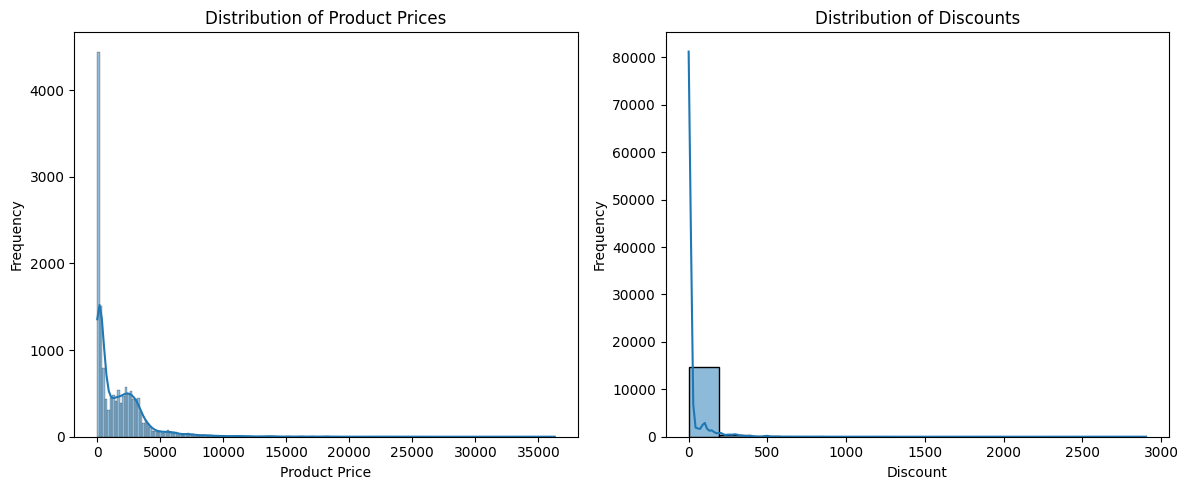

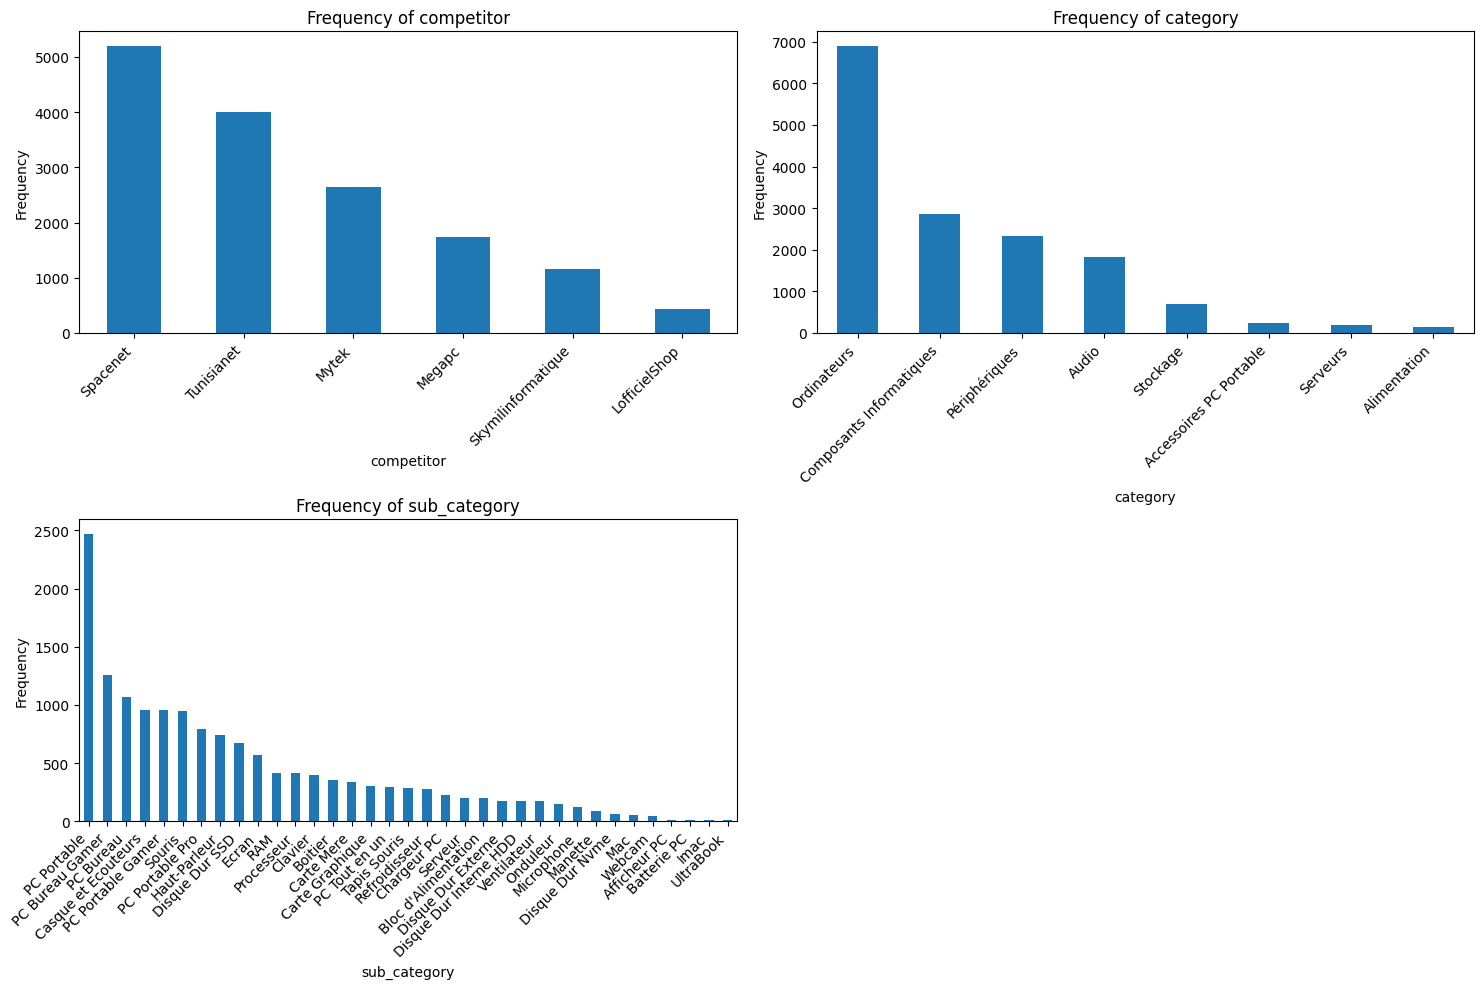

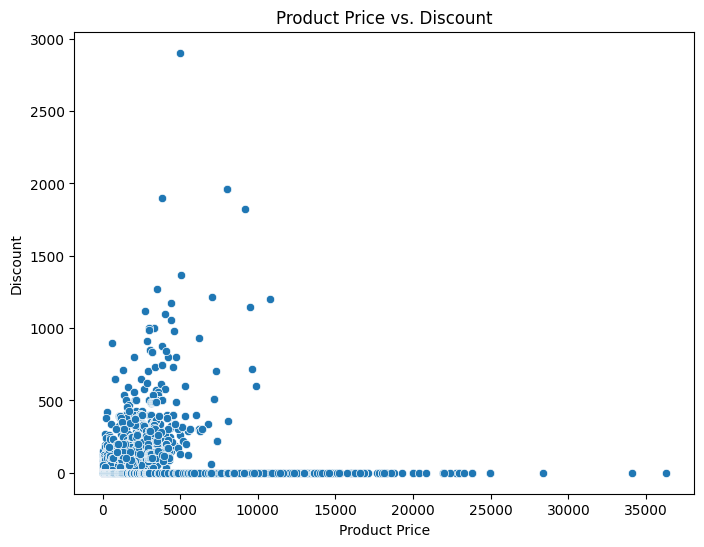

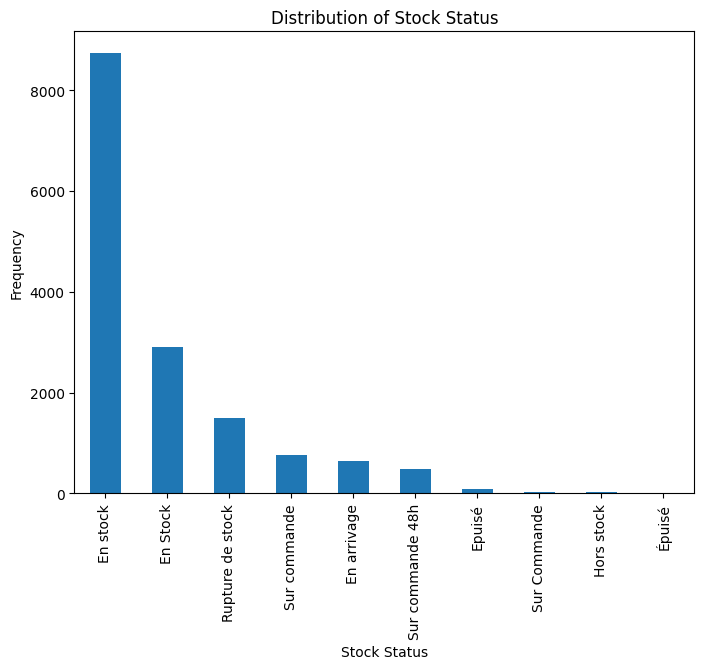

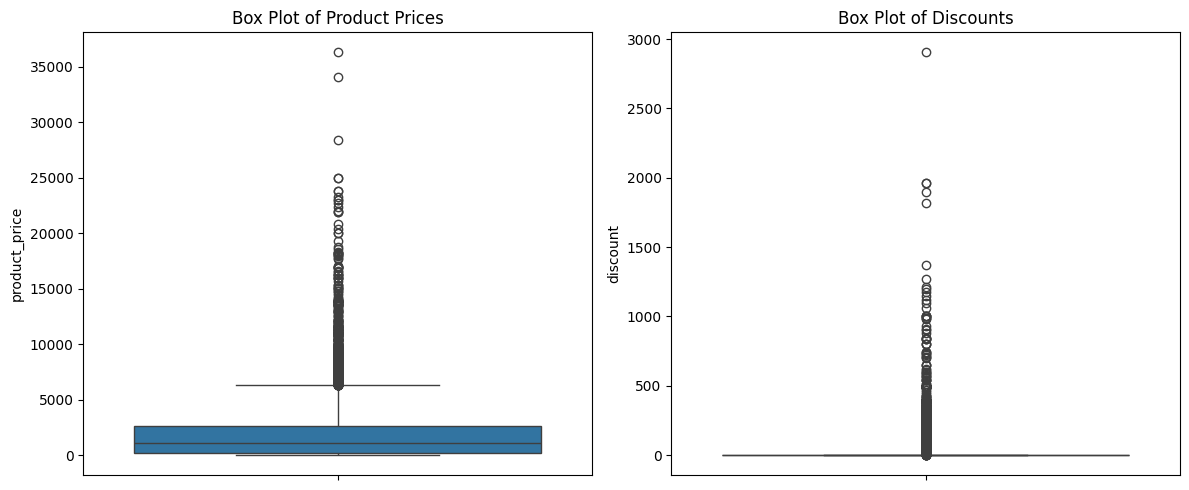

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Numerical Features (Histograms)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_products['product_price'], kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_products['discount'], kde=True)
plt.title('Distribution of Discounts')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Categorical Feature Analysis (Bar Charts)
categorical_cols = ['competitor', 'category', 'sub_category']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
  plt.subplot(2, 2, i + 1)
  df_products[col].value_counts().sort_values(ascending=False).plot(kind='bar')
  plt.title(f'Frequency of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Relationship between Numerical Features (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='product_price', y='discount', data=df_products)
plt.title('Product Price vs. Discount')
plt.xlabel('Product Price')
plt.ylabel('Discount')
plt.show()

# 4. Stock Status Distribution (Bar Chart)
plt.figure(figsize=(8, 6))
df_products['stock_status'].value_counts().plot(kind='bar')
plt.title('Distribution of Stock Status')
plt.xlabel('Stock Status')
plt.ylabel('Frequency')
plt.show()


# 5. Optional: Box Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_products['product_price'])
plt.title('Box Plot of Product Prices')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_products['discount'])
plt.title('Box Plot of Discounts')
plt.tight_layout()
plt.show()

## Summary:

### Q&A

No questions were asked in the provided text.


### Data Analysis Key Findings

* **Data Structure:** The JSON data was a list of dictionaries, directly convertible to a Pandas DataFrame.  The `_id` field contained nested dictionaries, requiring extraction of the `$oid` value into a new 'oid' column for analysis. This 'oid' column served as a unique product identifier.
* **Data Dimensions:** The dataset comprised 15,188 products with 9 initial features.
* **Missing Values:** No missing values were found in any column.
* **Numerical Features:**  `product_price` and `discount` showed a weak positive correlation (0.13). The distributions of these features were visualized using histograms and boxplots.
* **Categorical Features:** Imbalances were observed in categorical columns like `competitor`, `category`, and `sub_category`, with `Spacenet` being the most frequent competitor and `Ordinateurs` the most frequent category. Inconsistent capitalization was noted in the `stock_status` column ('En stock' vs. 'En Stock'). The frequency of each category was visualized using bar charts.


### Insights or Next Steps

* **Address Categorical Feature Imbalances:** Explore techniques like oversampling or undersampling to address the observed class imbalances in `competitor`, `category`, and `sub_category` if these features are crucial for downstream modeling tasks.
* **Clean Stock Status:** Standardize the capitalization in the `stock_status` column ('En stock' and 'En Stock') to ensure data consistency.
